In [1]:
import numpy as np
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/local/VANDERBILT/litz/github/MASILab/thoraxtools")
import func.vis.vis as vis
import glob
import re

In [2]:
label_dir = "/home/local/VANDERBILT/litz/data/luna16/automatic_pulmonary_lobe_segmentation_using_deep_learning/annotations"
# file_name = os.listdir(annotation_dir)[0]
label_name= "1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301_LobeSegmentation.nrrd"
label_path = os.path.join(label_dir, label_name)
1
# raw file
raw_dir = "/home/local/VANDERBILT/litz/data/luna16/raw/"
raw_name = "1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301.mhd"
raw_path = os.path.join(raw_dir, raw_name)

# segmentations
seg_dir = "/home/local/VANDERBILT/litz/data/luna16/johof_fused/"
seg_name = "1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301.mhd"
seg_path = os.path.join(seg_dir, seg_name)

In [4]:
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return itkimage, ct_scan, origin, spacing

In [5]:
label_sitk, label_img, origin, spacing = load_itk(label_path)
print(label_sitk.GetPixelIDTypeAsString())
raw_sitk, raw_img, origin, spacing = load_itk(raw_path)
print(raw_sitk.GetPixelIDTypeAsString())
seg_sitk, seg_img, origin, spacing = load_itk(seg_path)
print(np.unique(seg_img))
print(np.unique(label_img))

16-bit unsigned integer
16-bit signed integer


RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "/home/local/VANDERBILT/litz/data/luna16/johof_fused/1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301.mhd" does not exist.

In [2]:
def showslice(img, z, y, x, is_gray=False, clip_range=[]):
    clip_ax = img[z, :, :]
    clip_cor = img[:,y,:]
    clip_cor = np.flip(clip_cor, 0)
    clip_sag = img[:,:,x]
    clip_sag = np.flip(clip_sag, 0)
    if len(clip_range) > 0:
        vmin = clip_range[0]
        vmax = clip_range[1]
    else:
        vmax = np.max(img)
        vmin = np.min(img)
    # fig = plt.figure(1)
    f, ax = plt.subplots(1, 3, figsize=(15, 15))
    if is_gray:
        ax[0].imshow(clip_ax, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        ax[1].imshow(clip_cor, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        sag = ax[2].imshow(clip_sag, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        
    else:
        ax[0].imshow(clip_ax, interpolation='nearest', vmin=vmin, vmax=vmax)
        ax[1].imshow(clip_cor, interpolation='nearest', vmin=vmin, vmax=vmax)
        sag = ax[2].imshow(clip_sag, interpolation='nearest', vmin=vmin, vmax=vmax)
    plt.colorbar(sag, ax=ax[2], fraction=0.046, pad=0.04)

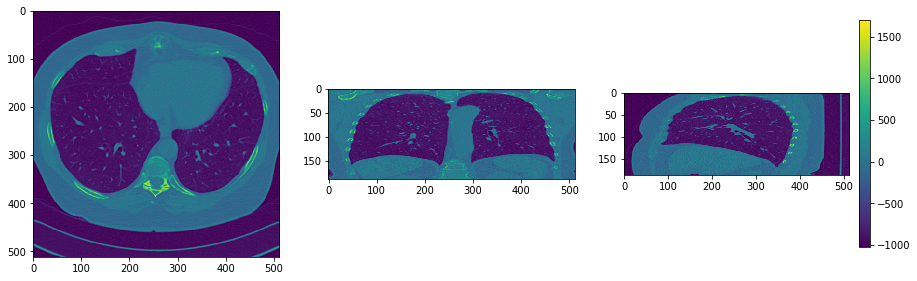

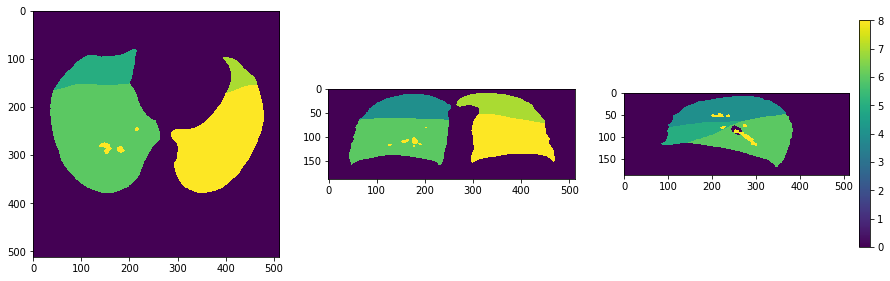

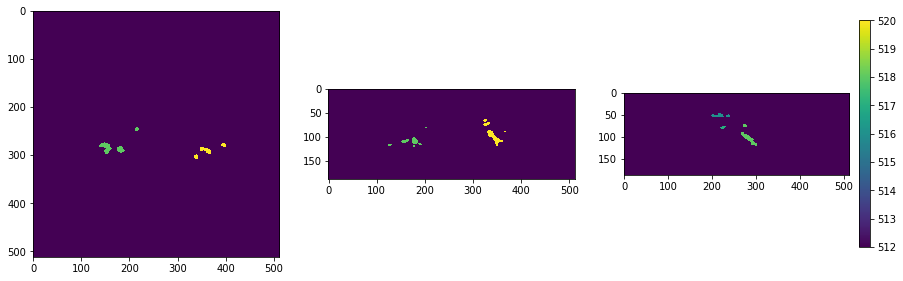

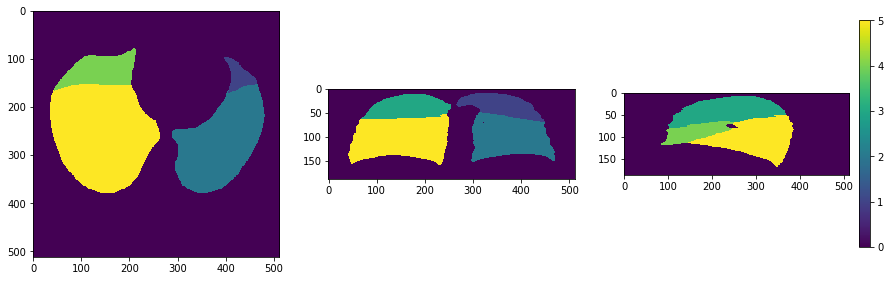

In [71]:
showslice(raw_img, 76, 286, 176)
showslice(label_img, 76, 286, 176, clip_range=[0,8])
showslice(label_img, 76, 286, 176, clip_range=[512,520])
showslice(seg_img, 76, 286, 176)

### Writing sitk images

In [6]:
# Write seg as same data type as original labels
out_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/tmp"
print(label_sitk.GetPixelIDTypeAsString())
seg = sitk.GetImageFromArray(label_img)
seg.CopyInformation(label_sitk)

sitk.WriteImage(seg, os.path.join(out_path, "test.nrrd"))

seg_sitk, seg_img, origin, spacing = load_itk(os.path.join(out_path, "test.nrrd"))

16-bit unsigned integer


AttributeError: 'Image' object has no attribute 'dtype'

[-194.       -108.300003 -187.699997]
[1.25       0.54882801 0.54882801]


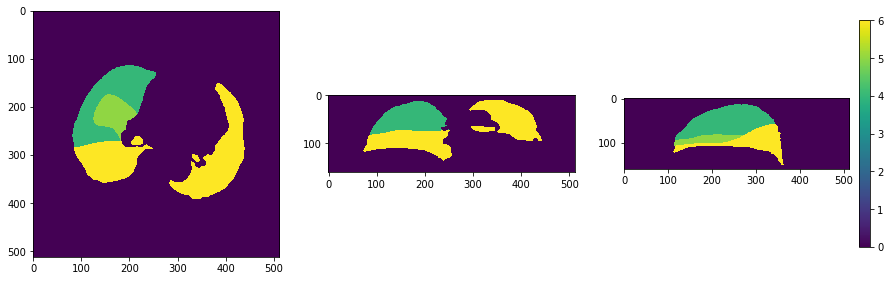

In [21]:
print(origin)
print(spacing)
showslice(seg_img, 76, 286, 176, clip_range=[0,6])

### Setting up file paths

In [32]:
label_path = "/home/local/VANDERBILT/litz/data/luna16/automatic_pulmonary_lobe_segmentation_using_deep_learning/annotations"
raw_path = "/home/local/VANDERBILT/litz/data/luna16/raw"

label_paths = glob.glob(os.path.join(label_path, "*.nrrd"))
a = os.path.basename(label_paths[0])
# regex match using positive lookahead
raw_names = [re.match("^.*(?=_LobeSegmentation)", os.path.basename(path)).group() for path in label_paths]
raw_paths = [os.path.join(raw_path, name) for name in raw_names]


['/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.281967919138248195763602360723',
 '/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301',
 '/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748',
 '/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.272042302501586336192628818865',
 '/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.183843376225716802567192412456',
 '/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.670107649586205629860363487713',
 '/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.134638281277099121660656324702',
 '/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.330643702676971528301859647742',
 '/home/local/VANDERBILT/litz/data/luna16/raw/1.3.6.1.4.1.14519.5.2.1.6279.6001.1198065274881087

### Level set segmentations

In [7]:
lvlset_dir = "/home/local/VANDERBILT/litz/data/luna16/lvlsetseg/"
johof_dir = "/home/local/VANDERBILT/litz/data/luna16/johof_fused/"
scanid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.255999614855292116767517149228.mhd"
lvlset_path = os.path.join(lvlset_dir, f"lvlsetseg_{scanid}")
johof_path = os.path.join(johof_dir, f"johof_fused_{scanid}")
johof_sitk, johof_img, origin, spacing = load_itk(johof_path)
lvlset_sitk, lvlset_img, origin, spacing = load_itk(lvlset_path)

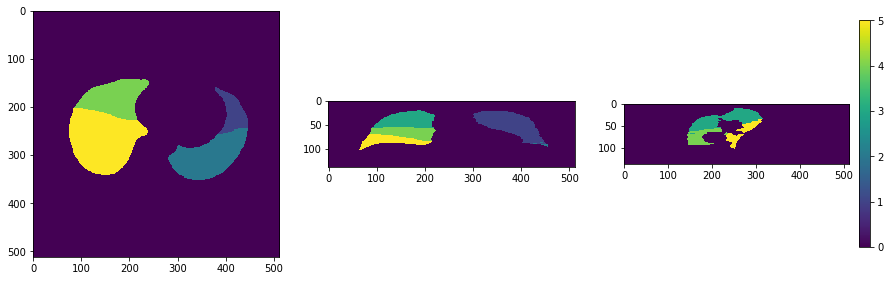

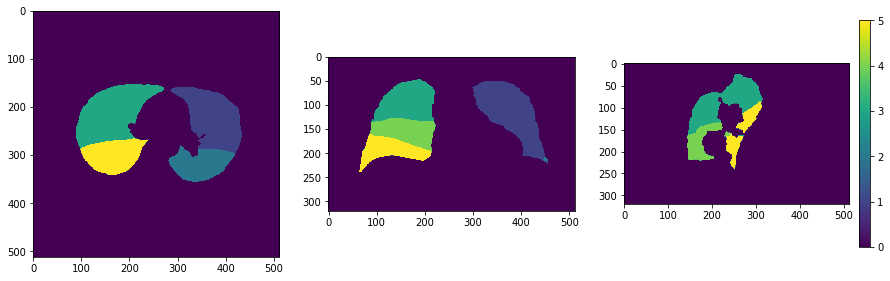

In [13]:
showslice(johof_img, 60,220,220)
showslice(lvlset_img, 200,220,220)